# Homework 2: Univariate Statistics

## 0. Download the data from: 

* [https://www.kaggle.com/mylesoneill/world-university-rankings](https://www.kaggle.com/mylesoneill/world-university-rankings)

There are three rankings of universities included in the dataset: Center for World University Rankings (*CWUR*), Times Higher Education World University Rankings (*Times*), and Academic Ranking of World Universities (ARWU, or *Shanghai*).

Look at the column descriptions on the Kaggle page. Note that for some columns, there may be some missing values or values that may need some munging in order for your analysis to succeed. **Be sure to look at the values in the columns you work with using `describe()`**—if data are missing or nonsensical, this may suggest that you need to take extra steps to read them in properly.

## Reading in the Data

In [746]:
# import packages
%matplotlib inline
import pandas as pd
from pandas.plotting import lag_plot
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [747]:
# import Center for World University Rankings (CWUR) data
cwur_df = pd.read_csv('data_2/cwurData.csv')
cwur_df.head()

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012


In [748]:
cwur_df.dtypes

world_rank                int64
institution              object
country                  object
national_rank             int64
quality_of_education      int64
alumni_employment         int64
quality_of_faculty        int64
publications              int64
influence                 int64
citations                 int64
broad_impact            float64
patents                   int64
score                   float64
year                      int64
dtype: object

In [749]:
# import Times Higher Education World University Rankings (Times) data
times_df = pd.read_csv('data_2/timesData.csv')
times_df.head()

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,"20,152",8.9,25%,NaN,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,"2,243",6.9,27%,33 : 67,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,"11,074",9.0,33%,37 : 63,2011
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,"15,596",7.8,22%,42 : 58,2011
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,-,94.2,"7,929",8.4,27%,45 : 55,2011


In [750]:
# Looking at all of the data types, we can see that not all of the numeric data is in numeric form, 
# this will require converting the data from string to numeric
times_df.dtypes

world_rank                 object
university_name            object
country                    object
teaching                  float64
international              object
research                  float64
citations                 float64
income                     object
total_score                object
num_students               object
student_staff_ratio       float64
international_students     object
female_male_ratio          object
year                        int64
dtype: object

In [751]:
# From this list, we can see that there are NaN values along with numeric values that are represented as panda object data types 
# times_df['num_students'].value_counts()
student_lst = list(times_df['num_students'])
print(student_lst[:200])

['20,152', '2,243', '11,074', '15,596', '7,929', '18,812', '19,919', '36,186', '15,060', '11,751', '38,206', '14,221', '15,128', '21,424', '18,178', '41,786', '66,198', '25,055', '20,376', '11,885', '19,835', '26,607', '44,020', '15,172', '18,334', '26,199', '19,967', '3,055', '22,020', '50,152', '26,518', '27,233', '42,727', '31,592', '31,326', '40,128', '40,148', '12,528', '2,429', '25,774', '11,385', '2,400', '14,604', '7,774', '25,581', nan, '6,333', '9,666', '26,614', '14,290', '12,161', '46,825', '10,410', '35,364', '8,653', '56,959', '22,809', '39,763', '24,789', '42,056', '12,338', '35,691', '11,829', '26,485', '9,259', '51,462', '29,325', '17,906', '17,404', '6,753', '41,868', '23,845', '20,771', '36,534', '7,867', '15,521', '21,394', '21,908', '9,027', '12,001', '34,718', nan, '28,881', '25,674', '15,489', nan, '34,938', '8,747', '28,251', '20,925', '26,583', '7,326', '23,823', '22,193', '20,541', '36,429', '12,551', '31,331', '6,178', '2,218', '35,565', '23,505', '8,338', '6

In [752]:
# Converting the columns the require numeric data to be numeric; I did not include international_students or female_male_ratio because they will not convert properly
# This will change the data in the total_score column from string to int:
# https://stackoverflow.com/questions/39694192/convert-string-column-to-integer
times_df['world_rank']= pd.to_numeric(times_df['world_rank'], errors='coerce')
times_df['international']= pd.to_numeric(times_df['international'], errors='coerce')
times_df['income']= pd.to_numeric(times_df['income'], errors='coerce')
times_df['total_score']= pd.to_numeric(times_df['total_score'], errors='coerce')

# Remove comma from num_students
# times_df['num_students'] = times_df['num_students'].astype(str)
# times_df['num_students'] = times_df['num_students'].str.replace(',', '')
# times_df['num_students'] = pd.to_numeric(times_df.num_students, errors='coerce')
times_df.num_students = times_df.num_students.str.replace(',', '').astype(float)

times_df.dtypes

world_rank                float64
university_name            object
country                    object
teaching                  float64
international             float64
research                  float64
citations                 float64
income                    float64
total_score               float64
num_students              float64
student_staff_ratio       float64
international_students     object
female_male_ratio          object
year                        int64
dtype: object

In [753]:
# num_students column has successfully been converted to float values
student_lst = list(times_df['num_students'])
print(student_lst[:200])

[20152.0, 2243.0, 11074.0, 15596.0, 7929.0, 18812.0, 19919.0, 36186.0, 15060.0, 11751.0, 38206.0, 14221.0, 15128.0, 21424.0, 18178.0, 41786.0, 66198.0, 25055.0, 20376.0, 11885.0, 19835.0, 26607.0, 44020.0, 15172.0, 18334.0, 26199.0, 19967.0, 3055.0, 22020.0, 50152.0, 26518.0, 27233.0, 42727.0, 31592.0, 31326.0, 40128.0, 40148.0, 12528.0, 2429.0, 25774.0, 11385.0, 2400.0, 14604.0, 7774.0, 25581.0, nan, 6333.0, 9666.0, 26614.0, 14290.0, 12161.0, 46825.0, 10410.0, 35364.0, 8653.0, 56959.0, 22809.0, 39763.0, 24789.0, 42056.0, 12338.0, 35691.0, 11829.0, 26485.0, 9259.0, 51462.0, 29325.0, 17906.0, 17404.0, 6753.0, 41868.0, 23845.0, 20771.0, 36534.0, 7867.0, 15521.0, 21394.0, 21908.0, 9027.0, 12001.0, 34718.0, nan, 28881.0, 25674.0, 15489.0, nan, 34938.0, 8747.0, 28251.0, 20925.0, 26583.0, 7326.0, 23823.0, 22193.0, 20541.0, 36429.0, 12551.0, 31331.0, 6178.0, 2218.0, 35565.0, 23505.0, 8338.0, 6671.0, 37032.0, 39256.0, 10221.0, 20040.0, 44501.0, 26389.0, 10441.0, nan, 9586.0, 8176.0, 31891.0, n

In [754]:
# All of the data looks to have been imported properly
times_df.head()

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1.0,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,20152.0,8.9,25%,NaN,2011
1,2.0,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,2243.0,6.9,27%,33 : 67,2011
2,3.0,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,11074.0,9.0,33%,37 : 63,2011
3,4.0,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,15596.0,7.8,22%,42 : 58,2011
4,5.0,Princeton University,United States of America,90.9,70.3,95.4,99.9,NaN,94.2,7929.0,8.4,27%,45 : 55,2011


In [755]:
# import Academic Ranking of World Universities (ARWU, or Shanghai) data
shanghai_df = pd.read_csv('data_2/shanghaiData.csv')
shanghai_df.head()

,world_rank,university_name,national_rank,total_score,alumni,award,hici,ns,pub,pcp,year
0,1,Harvard University,1,100.0,100.0,100.0,100.0,100.0,100.0,72.4,2005
1,2,University of Cambridge,1,73.6,99.8,93.4,53.3,56.6,70.9,66.9,2005
2,3,Stanford University,2,73.4,41.1,72.2,88.5,70.9,72.3,65.0,2005
3,4,"University of California, Berkeley",3,72.8,71.8,76.0,69.4,73.9,72.2,52.7,2005
4,5,Massachusetts Institute of Technology (MIT),4,70.1,74.0,80.6,66.7,65.8,64.3,53.0,2005


In [756]:
shanghai_df.dtypes

world_rank          object
university_name     object
national_rank       object
total_score        float64
alumni             float64
award              float64
hici               float64
ns                 float64
pub                float64
pcp                float64
year                 int64
dtype: object

In [757]:
# This list gives ranges, so I will not convert to int or float
rank_lst = list(shanghai_df['world_rank'])
print(rank_lst[:200])

['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '32', '34', '35', '36', '37', '38', '39', '39', '41', '41', '43', '43', '45', '46', '47', '47', '47', '50', '51', '52', '53', '54', '55', '56', '57', '57', '57', '60', '61', '62', '63', '64', '65', '65', '67', '67', '69', '69', '71', '72', '73', '73', '75', '76', '77', '78', '78', '80', '80', '82', '83', '84', '85', '86', '87', '87', '89', '90', '90', '92', '93', '93', '93', '93', '97', '98', '99', '100', '101-152', '101-152', '101-152', '101-152', '101-152', '101-152', '101-152', '101-152', '101-152', '101-152', '101-152', '101-152', '101-152', '101-152', '101-152', '101-152', '101-152', '101-152', '101-152', '101-152', '101-152', '101-152', '101-152', '101-152', '101-152', '101-152', '101-152', '101-152', '101-152', '101-152', '101-152', '101-152', '101-152', '101-152', '101-152', '101-152', '101-152', 

In [758]:
# This list gives ranges, so I will not convert to int or float
natl_rank_lst = list(shanghai_df['national_rank'])
print(natl_rank_lst[:200])

['1', '1', '2', '3', '4', '5', '6', '7', '8', '2', '9', '10', '11', '12', '13', '14', '15', '16', '17', '1', '18', '2', '3', '1', '19', '4', '1', '20', '21', '22', '23', '24', '24', '26', '27', '28', '2', '29', '30', '30', '32', '1', '33', '33', '1', '1', '5', '35', '35', '37', '1', '2', '6', '38', '39', '1', '1', '40', '2', '2', '2', '3', '41', '7', '8', '42', '3', '1', '43', '1', '3', '2', '4', '44', '45', '1', '46', '47', '1', '48', '9', '2', '10', '4', '1', '49', '50', '3', '51', '4', '5', '3', '4', '3', '5', '52', '1', '11', '4', '53', '2', '54-71', '54-71', '1-4', '1-4', '5', '54-71', '54-71', '54-71', '1-4', '6-9', '6-9', '54-71', '6-9', '1', '54-71', '54-71', '1', '54-71', '2-4', '2-4', '54-71', '12-15', '3-4', '1-4', '5', '3-4', '6-11', '54-71', '54-71', '6-11', '4', '3-4', '6-11', '54-71', '54-71', '54-71', '12-15', '12-15', '54-71', '54-71', '2-3', '6-11', '2-3', '1', '12-15', '3-4', '6-9', '6-11', '54-71', '6-11', '2-4', '1-2', '72-90', '16-19', '72-90', '5-7', '72-90', '72

## 1. Answer the questions below. 
- Write your Python code that can answer the following questions, and
- Explain your answers in plain English. 

### **Part 1.** For 10 Points: Compare the distributions of the scores across the three rankings

* Plot histograms and boxplots (or any other plots that you think to be helpful) for the overall scores for the CWUR, Times, and Shanghai rankings. What can you say about them?

## CWUR visualizations

In [759]:
# plotting histograms and boxplots of overall scores for CWUR data
cwur_df.shape
cwur_df.sort_values(by='score', ascending=False).head()

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
100,1,Harvard University,USA,1,1,1,1,1,1,1,NaN,7,100.00,2013
200,1,Harvard University,USA,1,1,1,1,1,1,1,1.0,2,100.00,2014
1200,1,Harvard University,USA,1,1,1,1,1,1,1,1.0,3,100.00,2015
201,2,Stanford University,USA,2,11,2,4,5,3,3,4.0,6,99.09,2014


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1c9d1048>]],
      dtype=object)

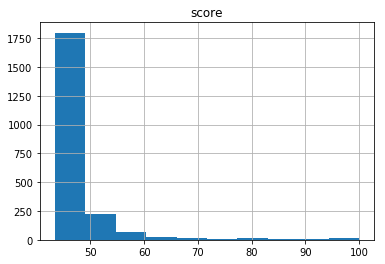

In [760]:
# histogram plot for CWUR data
#pd.cwur_df.plot(x='institution', y='score', kind='hist')
#sns.distplot(measures, kde=True)
#cwur_df.set_index('institution')['score'].plot.bar()
# cwur_score = cwur_df['score']
# print(cwur_score)
cwur_df.hist(column='score')

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


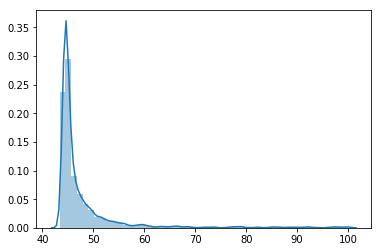

In [761]:
cwur_score = list(cwur_df['score'])
sns.distplot(cwur_score, kde=True)

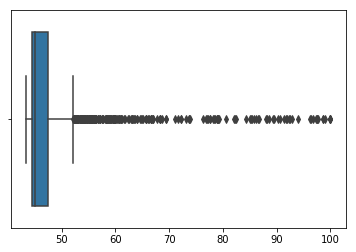

In [762]:
#CWUR boxplot
sns.boxplot(x=cwur_score) 

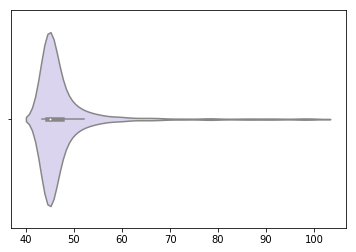

In [763]:
# CWUR violin plot
sns.violinplot(x=cwur_score,color="#d7d0f3")

## Times visualizations

In [764]:
# plotting histograms and boxplots of overall scores for Times data
times_df.shape

(2603, 14)

In [765]:
times_df.head()
#.sort_values(by='score', ascending=False)

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1.0,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,20152.0,8.9,25%,NaN,2011
1,2.0,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,2243.0,6.9,27%,33 : 67,2011
2,3.0,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,11074.0,9.0,33%,37 : 63,2011
3,4.0,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,15596.0,7.8,22%,42 : 58,2011
4,5.0,Princeton University,United States of America,90.9,70.3,95.4,99.9,NaN,94.2,7929.0,8.4,27%,45 : 55,2011


In [766]:
times_df.describe()

,world_rank,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,year
count,1112.000000,2603.000000,2594.000000,2603.000000,2603.000000,2385.000000,1201.000000,2544.000000,2544.000000,2603.000000
mean,98.201439,37.801498,52.007440,35.910257,60.921629,48.979874,59.846128,23873.758648,18.445283,2014.075682
std,58.097290,17.604218,22.103825,21.254805,23.073219,21.179938,12.803446,17675.946877,11.458698,1.685733
min,1.000000,9.900000,7.100000,2.900000,1.200000,24.200000,41.400000,462.000000,0.600000,2011.000000
25%,48.000000,24.700000,33.425000,19.600000,45.500000,33.000000,50.300000,12637.750000,11.975000,2013.000000
50%,97.000000,33.900000,50.300000,30.500000,62.500000,41.000000,56.000000,20851.000000,16.100000,2014.000000
75%,148.000000,46.400000,69.000000,47.250000,79.050000,59.000000,66.200000,29991.000000,21.500000,2016.000000
max,200.000000,99.700000,100.000000,99.400000,100.000000,100.000000,96.100000,379231.000000,162.600000,2016.000000


In [767]:
times_df.dtypes

world_rank                float64
university_name            object
country                    object
teaching                  float64
international             float64
research                  float64
citations                 float64
income                    float64
total_score               float64
num_students              float64
student_staff_ratio       float64
international_students     object
female_male_ratio          object
year                        int64
dtype: object

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1ca91a20>]],
      dtype=object)

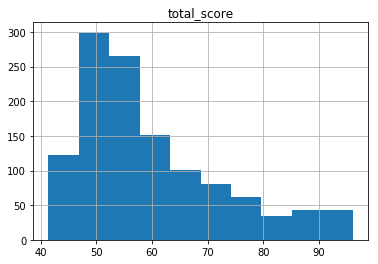

In [768]:
# histogram for Times total_scores data
times_df.hist(column='total_score')

In [769]:
# Seaborn doesn't deal well with NaN values, so will use plot above from matplotlib
# numeric_times_score = list(numeric_times_df['total_score'])
# sns.distplot(numeric_times_score, kde=True)

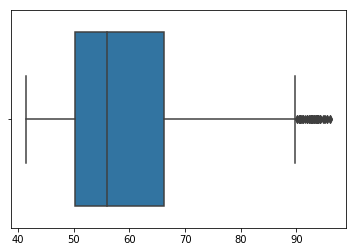

In [770]:
# boxplot for Times data
times_score = list(times_df['total_score'])
sns.boxplot(x=times_score) 

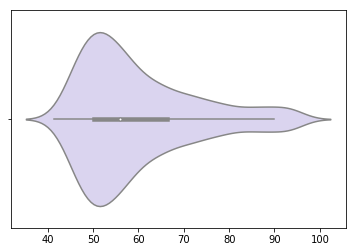

In [771]:
# violin plot for Times data
sns.violinplot(x=times_score,color="#d7d0f3")

In [772]:
# data in the dataframe and the .describe look similar for now, will move on to plot the data
shanghai_df.head()

,world_rank,university_name,national_rank,total_score,alumni,award,hici,ns,pub,pcp,year
0,1,Harvard University,1,100.0,100.0,100.0,100.0,100.0,100.0,72.4,2005
1,2,University of Cambridge,1,73.6,99.8,93.4,53.3,56.6,70.9,66.9,2005
2,3,Stanford University,2,73.4,41.1,72.2,88.5,70.9,72.3,65.0,2005
3,4,"University of California, Berkeley",3,72.8,71.8,76.0,69.4,73.9,72.2,52.7,2005
4,5,Massachusetts Institute of Technology (MIT),4,70.1,74.0,80.6,66.7,65.8,64.3,53.0,2005


In [773]:
# histogram plots for the shanghai dataset - commented out because it takes up a lot of space
# shanghai_df.describe

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a200fe2b0>]],
      dtype=object)

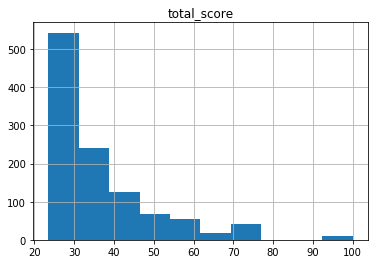

In [774]:
# histogram of shanghai dataset total_score
shanghai_df.hist(column='total_score')

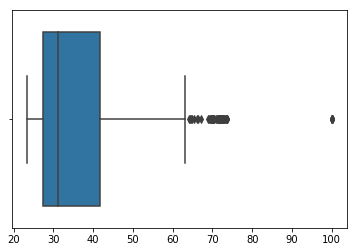

In [775]:
# boxplot for shanghai data
shanghai_scores = list(shanghai_df['total_score'])
sns.boxplot(x=shanghai_scores)

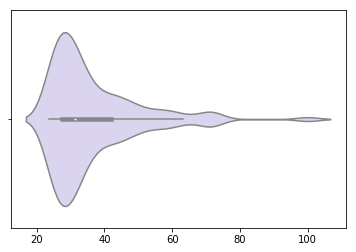

In [776]:
# violin plot for shanghai data
sns.violinplot(x=shanghai_scores,color="#d7d0f3")

The plots for the CWUR data show a spike between 40 and 50 that sharply decreases near 50. From 50 to 100, the values slowly decrease. This shows that the majority of the universities have scores between the 40 and 50 range, with a mean at about 45. The plots for the Times are not the same in that they show the majority of the data lies between the 50 and 65 range, with a mean around 56. The data tapers off between 60 and 100, but more gradually than in the CWUR data. The data from ARWU, or Shanghai, looks to have most of its scores ranging between 28 and 43, with a mean that looks to be close to 31. The outliers for the ARWU data seem to vary more compared to the other datasets in that many of them are clustered between 65 and 75, but only one has a value close to 100. 

### **Part 2.** For 10 Points: Using the Times data, look at the number of students (`num_students` column) for all universities in 2015.

* Plot the distribution using the `multiplePlots` function from Lab 3. What does it look like?
* Compare the mean and median. Are they similar or different, and why?
* Which school has the most students?

In [777]:
times_df.head()

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1.0,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,20152.0,8.9,25%,NaN,2011
1,2.0,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,2243.0,6.9,27%,33 : 67,2011
2,3.0,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,11074.0,9.0,33%,37 : 63,2011
3,4.0,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,15596.0,7.8,22%,42 : 58,2011
4,5.0,Princeton University,United States of America,90.9,70.3,95.4,99.9,NaN,94.2,7929.0,8.4,27%,45 : 55,2011


In [778]:
# data_2015 is a dataframe from the cleaned times_df that only shows data from the year 2015
data_2015 = times_df.groupby('year')
data_2015 = data_2015.get_group(2015)
data_2015.head()

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
1402,1.0,California Institute of Technology,United States of America,92.2,67.0,98.1,99.7,89.1,94.3,2243.0,6.9,27%,33 : 67,2015
1403,2.0,Harvard University,United States of America,92.9,67.6,98.6,98.9,44.0,93.3,20152.0,8.9,25%,NaN,2015
1404,3.0,University of Oxford,United Kingdom,88.6,90.7,97.7,95.5,72.9,93.2,19919.0,11.6,34%,46 : 54,2015
1405,4.0,Stanford University,United States of America,91.5,69.0,96.7,99.1,63.1,92.9,15596.0,7.8,22%,42 : 58,2015
1406,5.0,University of Cambridge,United Kingdom,89.7,87.8,95.6,95.2,51.1,92.0,18812.0,11.8,34%,46 : 54,2015


In [779]:
# cleaned_data_2015 is a times_df data frame cleaned all NaN values for the year 2015
cleaned_data_2015 = data_2015.dropna(subset=['num_students'])
cleaned_data_2015.head()

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
1402,1.0,California Institute of Technology,United States of America,92.2,67.0,98.1,99.7,89.1,94.3,2243.0,6.9,27%,33 : 67,2015
1403,2.0,Harvard University,United States of America,92.9,67.6,98.6,98.9,44.0,93.3,20152.0,8.9,25%,NaN,2015
1404,3.0,University of Oxford,United Kingdom,88.6,90.7,97.7,95.5,72.9,93.2,19919.0,11.6,34%,46 : 54,2015
1405,4.0,Stanford University,United States of America,91.5,69.0,96.7,99.1,63.1,92.9,15596.0,7.8,22%,42 : 58,2015
1406,5.0,University of Cambridge,United Kingdom,89.7,87.8,95.6,95.2,51.1,92.0,18812.0,11.8,34%,46 : 54,2015


In [780]:
# importing the code from Lab 3 for the multiplePlots function

def multiplePlots( series ):
    
    fig, axs = plt.subplots(2,2)
    plt.tight_layout(pad=0.4, w_pad=4, h_pad=1.0)

    # Histogram
    sns.distplot(series, ax=axs[0,0])
    
    # Lag plot
    lag = series.copy()
    lag = np.array(lag[:-1])
    current = series[1:]
    ax = sns.regplot(current,lag,fit_reg=False, ax=axs[0,1])
    ax.set_ylabel("y_i-1")
    ax.set_xlabel("y_i")
    
    # QQ plot
    qntls, xr = stats.probplot(series, fit=False)
    sns.regplot(xr,qntls, ax=axs[1,0])
    
    # Run sequence
    ax = sns.regplot(np.arange(len(series)),series, ax=axs[1,1])
    ax.set_ylabel("val")
    ax.set_xlabel("i")

In [781]:
# Creating a list of the num_students data
num_students_2015 = list(data_2015['num_students'])
# print(num_students_2015[:20])

# Removing all of the NaN values from num_students_2015 so it can be used to create plots 
#in the multiplePlots function
# Credit: https://stackoverflow.com/questions/21011777/how-can-i-remove-nan-from-list-python-numpy
cleaned_num_students_2015 = [x for x in num_students_2015 if str(x) != 'nan']
print(cleaned_num_students_2015[:10])

[2243.0, 20152.0, 19919.0, 15596.0, 18812.0, 11074.0, 7929.0, 36186.0, 15060.0, 11751.0]


In [782]:
print(type(cleaned_num_students_2015[0]))

<class 'float'>


In [783]:
# Creating a list and trying to plot from that list did not work
# multiplePlots(cleaned_num_students_2015)

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


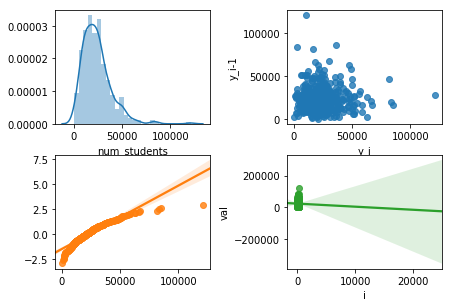

In [784]:
# Plotting from a column of a data frame worked
multiplePlots(cleaned_data_2015['num_students'])

In [785]:
# statistics for the num_students column
data_2015['num_students'].describe()

count       390.000000
mean      23638.576923
std       14834.339363
min         462.000000
25%       12566.500000
50%       21086.500000
75%       30114.250000
max      120986.000000
Name: num_students, dtype: float64

In [786]:
# statistics for each of the columns
data_2015.describe()

,world_rank,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,year
count,201.000000,401.000000,401.000000,401.000000,401.000000,381.000000,201.000000,390.000000,390.000000,401.0
mean,100.641791,38.370823,56.032918,37.202743,68.483791,51.191339,58.940796,23638.576923,18.705641,2015.0
std,58.006129,16.055115,19.482368,19.674056,16.664772,21.075274,12.239997,14834.339363,11.516260,0.0
min,1.000000,13.000000,16.600000,6.500000,28.000000,28.100000,45.600000,462.000000,2.600000,2015.0
25%,51.000000,27.600000,40.600000,23.000000,55.800000,34.800000,50.100000,12566.500000,12.025000,2015.0
50%,101.000000,34.500000,54.700000,32.500000,68.500000,43.400000,54.300000,21086.500000,16.050000,2015.0
75%,150.000000,44.600000,70.600000,46.300000,80.500000,61.900000,64.700000,30114.250000,21.825000,2015.0
max,200.000000,92.900000,98.800000,98.600000,100.000000,100.000000,94.300000,120986.000000,72.500000,2015.0


In [787]:
np.mean(cleaned_num_students_2015)

23638.576923076922

In [788]:
np.median(cleaned_num_students_2015)

21086.5

In [789]:
# finding university name for column with the only value for number of students
uni_num_students_2015 = data_2015[['university_name','num_students']]
uni_num_students_2015.head()
# print(type(uni_num_students_2015))
# uni_num_students_2015[uni_num_students_2015['num_students']==462.0]

,university_name,num_students
1402,California Institute of Technology,2243.0
1403,Harvard University,20152.0
1404,University of Oxford,19919.0
1405,Stanford University,15596.0
1406,University of Cambridge,18812.0


In [790]:
# finding the university name with the most number of students
greatest_num_students = data_2015[['university_name', 'num_students']].sort_values(by=['num_students'], ascending=False)
greatest_num_students.head()

,university_name,num_students
1722,Sapienza University of Rome,120986.0
1692,University of Bologna,85532.0
1583,Arizona State University,83236.0
1620,University of São Paulo,81402.0
1675,University of Turin,67552.0


### Findings for Part 2.

Using the data from the num_students column of the Times dataset, I created a new subset of data containing only the rows with the year 2015. Plotting the distribution using the multiplePlots function from lab shows a distribution that is not normal. It seems to right-skewed and not homoscedastic. 

I using the numpy functions for mean and median to calculate the respective values. We can see that there is a mean value of 23638.577 and a median value of 21086.5. The values are different, which shows that the data is not symmetric. This supports what was shown in the plots, where the data looks to be right-skewed, meaning the mean should be to the right of the median, or larger than the median. 

The university with the largest student population in the Times dataset in 2015 is Sapienza University of Rome with 120,986 students.

### **Part 3.** For 10 points: Using the Times data, compare the international outlook scores (`international` column) for universities in the US versus universities outside the US.

* Plot their distributions for 2011 and describe them. Identify their their mean and median.
* Repeat this for 2016. Has the result changed?

In [791]:
# Split dataset by US and not US, create a new column where 0=US, 1=nonUS
# Source: https://stackoverflow.com/questions/35666272/equivalent-of-r-ifelse-in-python-pandas-compare-string-columns
times_df['country_code'] = np.where(times_df.country=='United States of America', 0,1)

In [792]:
# checking that times_df now has an extra column that assigns any school in the US a country_code=0 and any school not in the US country_code=1 
times_df.head()

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year,country_code
0,1.0,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,20152.0,8.9,25%,NaN,2011,0
1,2.0,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,2243.0,6.9,27%,33 : 67,2011,0
2,3.0,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,11074.0,9.0,33%,37 : 63,2011,0
3,4.0,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,15596.0,7.8,22%,42 : 58,2011,0
4,5.0,Princeton University,United States of America,90.9,70.3,95.4,99.9,NaN,94.2,7929.0,8.4,27%,45 : 55,2011,0


In [793]:
# look at 2011 data for Times (numeric_times_df) data, specifically, look at the international outlook scores; 
# compare universities in the US vs universities not in the US
# counts = times_df['university_name'].value_counts().to_dict()

# make a new data frame with only 2011 data, then grouby country_code and 
times_df_2011 = times_df.groupby('year')
times_df_2011 = times_df_2011.get_group(2011)
times_df_2011.head()

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year,country_code
0,1.0,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,20152.0,8.9,25%,NaN,2011,0
1,2.0,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,2243.0,6.9,27%,33 : 67,2011,0
2,3.0,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,11074.0,9.0,33%,37 : 63,2011,0
3,4.0,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,15596.0,7.8,22%,42 : 58,2011,0
4,5.0,Princeton University,United States of America,90.9,70.3,95.4,99.9,NaN,94.2,7929.0,8.4,27%,45 : 55,2011,0


In [794]:
# Separate data frames for United States = 0 
us_0_2011_times_df = times_df_2011[times_df_2011['country_code']==0]
us_0_2011_times_df.head()

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year,country_code
0,1.0,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,20152.0,8.9,25%,NaN,2011,0
1,2.0,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,2243.0,6.9,27%,33 : 67,2011,0
2,3.0,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,11074.0,9.0,33%,37 : 63,2011,0
3,4.0,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,15596.0,7.8,22%,42 : 58,2011,0
4,5.0,Princeton University,United States of America,90.9,70.3,95.4,99.9,NaN,94.2,7929.0,8.4,27%,45 : 55,2011,0


In [953]:
num_us_schools = len(list(us_0_2011_times_df['university_name']))
print('This is the number of US schools in 2011: ' +str(num_us_schools))

This is the number of US schools in 2011: 72


In [795]:
# Separate data frames for Non United States = 1
non_us_1_2011_times_df = times_df_2011[times_df_2011['country_code']==1]
non_us_1_2011_times_df.head()

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year,country_code
5,6.0,University of Cambridge,United Kingdom,90.5,77.7,94.1,94.0,57.0,91.2,18812.0,11.8,34%,46 : 54,2011,1
6,6.0,University of Oxford,United Kingdom,88.2,77.2,93.9,95.1,73.5,91.2,19919.0,11.6,34%,46 : 54,2011,1
8,9.0,Imperial College London,United Kingdom,89.2,90.0,94.5,88.3,92.9,90.6,15060.0,11.7,51%,37 : 63,2011,1
14,15.0,ETH Zurich – Swiss Federal Institute of Techno...,Switzerland,77.5,93.7,87.8,83.1,NaN,83.4,18178.0,14.7,37%,31 : 69,2011,1
16,17.0,University of Toronto,Canada,75.8,NaN,87.9,82.2,NaN,82.0,66198.0,19.5,15%,NaN,2011,1


In [955]:
num_nonus_schools = len(list(non_us_1_2011_times_df['university_name']))
print('This is the number of non-US schools in 2011: ' +str(num_nonus_schools))

This is the number of non-US schools in 2011: 128


### Visualizations and Scores for the US - 2011

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


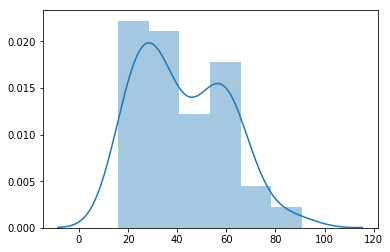

In [796]:
# Plot for US=0 2011 'international' data
us_international = list(us_0_2011_times_df['international'])
sns.distplot(us_international, kde=True)

In [797]:
# Print Mean and Median for 2011 international data
print(np.mean(us_international), np.median(us_international))

42.23055555555556 38.6


### Visualizations and Scores for Non US - 2011

[77.7, 77.2, 90.0, 93.7, 91.4, 90.8, 18.4, 32.6, 93.3, 97.8, 85.9, 88.0, 68.6, 77.9, 67.3, 97.4, 44.9, 93.9, 44.5, 100.0, 18.4, 43.0, 43.1, 67.2, 89.6, 87.5, 84.2, 85.9, 36.7, 72.8, 74.2, 66.6, 63.4, 65.7, 99.5, 79.1, 92.9, 56.8, 69.0, 87.9, 87.0, 91.3, 37.6, 85.3, 24.2, 85.7, 34.1, 83.3, 44.9, 71.8, 47.7, 24.8, 44.9, 29.2, 95.7, 29.6, 50.2, 91.0, 64.0, 24.7, 73.8, 40.0, 71.6, 55.1, 20.1, 20.1, 46.2, 66.6, 84.1, 62.7, 30.6, 30.7, 54.4, 22.3, 52.6, 24.3, 94.3, 73.8, 19.3, 77.9, 82.9, 86.1, 47.4, 88.5, 80.5, 70.7, 44.1, 58.6, 21.3, 38.2, 59.8, 33.4, 50.0, 40.3, 35.5, 29.3, 56.1, 96.3, 62.8, 74.8, 45.8, 46.1, 87.1, 46.8, 57.9, 63.8, 27.2, 62.8, 62.4, 93.6, 47.3, 99.5, 57.8, 28.0, 44.9, 64.2, 63.2, 29.6, 51.9]


/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


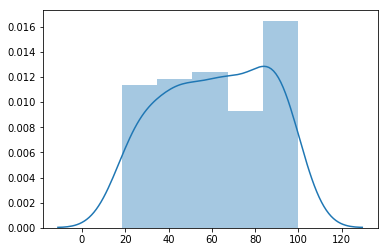

In [798]:
# Plot for Non US=1 2011 'international' data
non_us_international = list(non_us_1_2011_times_df['international'])
# print(non_us_international)

# This will remove all of the NaN values so we can make a plot in Seaborn
cleaned_non_us_international = [x for x in non_us_international if str(x) != 'nan']
print(cleaned_non_us_international)

# histogram of Non-US=1 2011 data from the international column
sns.distplot(cleaned_non_us_international, kde=True)

In [950]:
# Print Mean and Median for 2011 international data
internatl_2011_stats = (np.mean(cleaned_non_us_international), np.median(cleaned_non_us_international))
print(internatl_2011_stats)

(61.502521008403356, 63.2)


In [800]:
# make a new data frame with only 2016 data
times_df_2016 = times_df.groupby('year')
times_df_2016 = times_df_2016.get_group(2016)
times_df_2016.head()

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year,country_code
1803,1.0,California Institute of Technology,United States of America,95.6,64.0,97.6,99.8,97.8,95.2,2243.0,6.9,27%,33 : 67,2016,0
1804,2.0,University of Oxford,United Kingdom,86.5,94.4,98.9,98.8,73.1,94.2,19919.0,11.6,34%,46 : 54,2016,1
1805,3.0,Stanford University,United States of America,92.5,76.3,96.2,99.9,63.3,93.9,15596.0,7.8,22%,42 : 58,2016,0
1806,4.0,University of Cambridge,United Kingdom,88.2,91.5,96.7,97.0,55.0,92.8,18812.0,11.8,34%,46 : 54,2016,1
1807,5.0,Massachusetts Institute of Technology,United States of America,89.4,84.0,88.6,99.7,95.4,92.0,11074.0,9.0,33%,37 : 63,2016,0


In [801]:
# Separate data frames for United States = 0 
us_0_2016_times_df = times_df_2016[times_df_2016['country_code']==0]
us_0_2016_times_df.head()

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year,country_code
1803,1.0,California Institute of Technology,United States of America,95.6,64.0,97.6,99.8,97.8,95.2,2243.0,6.9,27%,33 : 67,2016,0
1805,3.0,Stanford University,United States of America,92.5,76.3,96.2,99.9,63.3,93.9,15596.0,7.8,22%,42 : 58,2016,0
1807,5.0,Massachusetts Institute of Technology,United States of America,89.4,84.0,88.6,99.7,95.4,92.0,11074.0,9.0,33%,37 : 63,2016,0
1808,6.0,Harvard University,United States of America,83.6,77.2,99.0,99.8,45.2,91.6,20152.0,8.9,25%,NaN,2016,0
1809,7.0,Princeton University,United States of America,85.1,78.5,91.9,99.3,52.1,90.1,7929.0,8.4,27%,45 : 55,2016,0


In [957]:
num_us_schools_16 = len(list(us_0_2016_times_df['university_name']))
print('This is the number of US schools in 2016: ' +str(num_us_schools_16))

This is the number of US schools in 2016: 146


In [802]:
# Separate data frames for Non United States = 1
non_us_1_2016_times_df = times_df_2016[times_df_2016['country_code']==1]
non_us_1_2016_times_df.head()

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year,country_code
1804,2.0,University of Oxford,United Kingdom,86.5,94.4,98.9,98.8,73.1,94.2,19919.0,11.6,34%,46 : 54,2016,1
1806,4.0,University of Cambridge,United Kingdom,88.2,91.5,96.7,97.0,55.0,92.8,18812.0,11.8,34%,46 : 54,2016,1
1810,8.0,Imperial College London,United Kingdom,83.3,96.0,88.5,96.7,53.7,89.1,15060.0,11.7,51%,37 : 63,2016,1
1811,9.0,ETH Zurich – Swiss Federal Institute of Techno...,Switzerland,77.0,97.9,95.0,91.1,80.0,88.3,18178.0,14.7,37%,31 : 69,2016,1
1816,14.0,University College London,United Kingdom,78.1,94.4,91.0,94.2,40.5,87.1,26607.0,10.7,46%,56 : 44,2016,1


In [959]:
num_nonus_schools_16 = len(list(non_us_1_2016_times_df['university_name']))
print('This is the number of non-US schools in 2016: ' +str(num_nonus_schools_16))

This is the number of non-US schools in 2016: 654


### Visualizations and Scores for the US - 2016

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


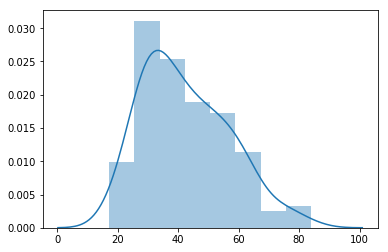

In [803]:
# Plot for US=0 2016 'international' data
us_international_2016 = list(us_0_2016_times_df['international'])
sns.distplot(us_international_2016, kde=True)

In [804]:
# Print Mean and Median for 2016 international data (United States=0)
print(np.mean(us_international_2016), np.median(us_international_2016))

42.43150684931507 40.2


### Visualizations and Scores for the Non US - 2016

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


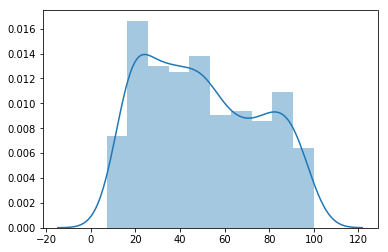

In [805]:
# Plot for Non US=1 2016 'international' data
non_us_international_2016 = list(non_us_1_2016_times_df['international'])
# print(non_us_international_2016)

# REMOVE NAN VALUES, THEN PLOT, OR LOOK AT SEABORN TO SEE IF IT WILL TAKE OUT NAN VALUES WITHIN PLOT FCN
sns.distplot(non_us_international_2016, kde=True)

In [806]:
# Print Mean and Median for 2011 international data (Non-US=1)
print(np.mean(non_us_international_2016), np.median(non_us_international_2016))

49.855198776758414 47.0


### Findings for Part 3.

**Plots and data for 2011**
The plots for the year 2011 show what looks like a bimodal distribution for the US institutions and and increasing trend for the data except for values between 70 and 80. The mean and median for US institutions is 42.2 and 38.6, respectively, while the mean and median for non-US institutions is 61.5 and 63.2. Both the plots and the statistical values show that the non-US institutions typically have higher values than the US institutions. This could have something to do with the fact that there are 72 schools from the US while there are 128 schools from outside of the US. 

**Plots and data for 2016**
In the plots for the year 2016, the US institutions data shows a plot that looks right-skewed, which may be confirmed with the mean and median values of 42.4 and 40.2 respectively. The plot for non-US institutions shows a plot that seems that it could have been right-skewed except for the values between 10 and 20. The mean and median for non-US institutions in 2016 is 49.8 and 47.0 respectively. The mean and median values for the 2016 data between US and non-US institutions is much closer than the difference between the mean and median values for the 2011 data. For the 2016 data, there are 146 schools from the US while there are 654 schools from outside of the US.   

**How the results have changed between 2011 and 2016**
The US data available for 2011 increased from 72 schools to 146 schools, while the data available for 2016 increased from 128 schools to 654 schools. This is a substantial increase for both categories and gives a greater opportunity for the data to be more normal. We can see in the plots for the US from 2011 to 2016 that the data looks more continuous. The same is true for the plots for non-US schools. There is more data to gather statistics from, which also had an effect on the mean and median values, where the values were much closer together in the 2016 data than they were in the 2011 data. 

### **Part 4.** For 10 Points: Using the data for the CWUR rankings, investigate how the rankings change over time.

* Which universities consistently appear in the rankings, and which aren't?
* Which universities are rising, falling, or stationary in rank over the years?
* Plot the results, and explain your answers

It might be more intuitive to compare the scores rather than the ranks directly. Feel free to do this if it's the case.

In [895]:
cwur_df.head()

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year,percent_change
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012,NaN
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012,-0.920000
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012,-0.250000
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012,-0.200000
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012,-0.166667


In [889]:
# compare the score across all of the schools that appear
# cwur_df['score'].dtype
cwur_df.head()

# make sure world rank data looks ok enough to use
world_rank = list(cwur_df['world_rank'])
print(world_rank[:30])

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


In [866]:
# This tells me which years are included
cwur_df['year'].value_counts()

2015    1000
2014    1000
2013     100
2012     100
Name: year, dtype: int64

In [906]:
# cwur_df[cwur_df['institution']=='Stanford University']

### Create a new column that demonstrates the percent change from year to year for the data

In [897]:
cwur_df[['percent_change']] = cwur_df.sort_values(['year']).groupby('institution')[['score']].pct_change()

In [905]:
# Checking the values for Harvard
cwur_df[cwur_df['institution']=='Harvard University']

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year,percent_change
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.0,2012,NaN
100,1,Harvard University,USA,1,1,1,1,1,1,1,NaN,7,100.0,2013,0.064509
200,1,Harvard University,USA,1,1,1,1,1,1,1,1.0,2,100.0,2014,1.121341
1200,1,Harvard University,USA,1,1,1,1,1,1,1,1.0,3,100.0,2015,1.271695


### Make a pivot table for the data based on score for each institution per year - table includes NaN values

In [904]:
# look at the score, look at the top 100
# make pivot tables so you can see the top scores over years
# make tables for year to year, i'e' 2012-2013, etc. 
# Make line graph for top 5
cwur_pivot_score = cwur_df.pivot(index='institution', columns='year', values='score' )
# cwur_pivot_score.head()
cwur_pivot_score = cwur_pivot_score.reset_index()
# cwur_pivot_score.loc['Harvard University']
cwur_pivot_score.head()

year,institution,2012,2013,2014,2015
0,AGH University of Science and Technology,NaN,NaN,44.71,44.26
1,Aalborg University,NaN,NaN,44.83,44.59
2,Aalto University,NaN,NaN,45.58,45.10
3,Aarhus University,NaN,NaN,50.17,49.65
4,Aberystwyth University,NaN,NaN,44.53,44.22


### Which universities consistently appear in the rankings, and which aren't? - tables don't include NaN values

In [917]:
# Remove rows with NaN values so data can be compared from year to year
consistent_rank_df = cwur_pivot_score[((cwur_pivot_score[2012].notna()) & (cwur_pivot_score[2013].notna())
                                     & (cwur_pivot_score[2014].notna()) & cwur_pivot_score[2015].notna())]

consistent_rank_df.head()

year,institution,2012,2013,2014,2015
17,Arizona State University,45.70,46.72,51.14,51.13
42,Boston University,48.31,48.96,53.96,53.43
49,Brown University,47.91,46.43,52.92,52.01
53,California Institute of Technology,85.21,77.59,85.50,84.40
58,Carnegie Mellon University,51.60,49.56,55.30,54.00


### List of the universities that have scores for each year and the number of universities in that list:

In [920]:
universities_appear = list(consistent_rank_df['institution'])
print("List of schools that consistently have scores:")
print(universities_appear)
print('\n')
print("Number of schools that consistently have scores: " + str(len(universities_appear)))

List of schools that consistently have scores:
['Arizona State University', 'Boston University', 'Brown University', 'California Institute of Technology', 'Carnegie Mellon University', 'Columbia University', 'Cornell University', 'Dartmouth College', 'Duke University', 'Emory University', 'Georgia Institute of Technology', 'Harvard University', 'Hebrew University of Jerusalem', 'Imperial College London', 'Johns Hopkins University', 'Karolinska Institute', 'Kyoto University', 'Ludwig Maximilian University of Munich', 'Massachusetts Institute of Technology', 'McGill University', 'Nagoya University', 'New York University', 'Northwestern University', 'Ohio State University, Columbus', 'Osaka University', 'Pennsylvania State University, University Park', 'Pierre-and-Marie-Curie University', 'Princeton University', 'Purdue University, West Lafayette', 'Rice University', 'Rockefeller University', 'Ruprecht Karl University of Heidelberg', 'Rutgers University-New Brunswick', 'Sapienza Universit

### List of universities that do no have scores every year and are not consistent - only a slice because the entire list is quite long

In [933]:
# make a list of universities that are not in the list above
not_consistent = []
total_lst = list(cwur_pivot_score['institution'])
for uni in total_lst:
    if uni not in universities_appear:
        not_consistent.append(uni)
        
print('The first 20 universities, or a slice, in the list of all the universities that do not have consistent rankings:')
print(not_consistent[:20])

m = not_consistent
print('\n')
print('There are ' + str(len(m)) + ' total universities with inconsistent scores')

The first 20 universities, or a slice, in the list of all the universities that do not have consistent rankings:
['AGH University of Science and Technology', 'Aalborg University', 'Aalto University', 'Aarhus University', 'Aberystwyth University', 'Adam Mickiewicz University in Poznań', 'Ain Shams University', 'Aix-Marseille University', 'Ajou University', 'Albany Medical College', 'Albert Ludwig University of Freiburg', 'Alexandria University', 'All India Institute of Medical Sciences, New Delhi', 'American University of Beirut', 'Amirkabir University of Technology', 'Ankara University', 'Aristotle University of Thessaloniki', 'Aston University', 'Auburn University', 'Australian National University']


There are 933 total universities with inconsistent scores


### Make a pivot table for the data based on percent change in score for each institution per year 

In [937]:
cwur_pivot_pct_chg = cwur_df.pivot(index='institution', columns='year', values='percent_change' )
cwur_pivot_pct_chg = cwur_pivot_pct_chg.reset_index()
cwur_pivot_pct_chg.head()

year,institution,2012,2013,2014,2015
0,AGH University of Science and Technology,NaN,NaN,0.000000,0.000000
1,Aalborg University,NaN,NaN,0.000000,-0.000224
2,Aalto University,NaN,NaN,0.000000,0.000000
3,Aarhus University,NaN,NaN,-0.002188,-0.054466
4,Aberystwyth University,NaN,NaN,0.000000,0.000000


In [935]:
# Remove rows with NaN values so data can be compared from year to year
clean_pct_chg = cwur_pivot_pct_chg[((cwur_pivot_pct_chg[2012].notna()) & (cwur_pivot_pct_chg[2013].notna())
                                     & (cwur_pivot_pct_chg[2014].notna()) & cwur_pivot_pct_chg[2015].notna())]

clean_pct_chg.head()

year,institution,2012,2013,2014,2015
17,Arizona State University,0.005058,-0.002775,-0.000782,-0.000196
42,Boston University,0.001036,0.000613,-0.002034,-0.000187
49,Brown University,0.003561,0.004109,-0.000189,-0.000384
53,California Institute of Technology,0.032848,0.316423,-0.003497,-0.025517
58,Carnegie Mellon University,0.004282,0.067413,-0.006646,-0.003322


Sort by score of school in 2012 to see which schools were considered top schools and to help determine a pattern.

In [939]:
# Merge percent change and score data frames
merged_df = consistent_rank_df.merge(clean_pct_chg, how='left', on=['institution'])
merged_df.head()

year,institution,2012_x,2013_x,2014_x,2015_x,2012_y,2013_y,2014_y,2015_y
0,Arizona State University,45.70,46.72,51.14,51.13,0.005058,-0.002775,-0.000782,-0.000196
1,Boston University,48.31,48.96,53.96,53.43,0.001036,0.000613,-0.002034,-0.000187
2,Brown University,47.91,46.43,52.92,52.01,0.003561,0.004109,-0.000189,-0.000384
3,California Institute of Technology,85.21,77.59,85.50,84.40,0.032848,0.316423,-0.003497,-0.025517
4,Carnegie Mellon University,51.60,49.56,55.30,54.00,0.004282,0.067413,-0.006646,-0.003322


In [946]:
sorted_by_score = merged_df.sort_values('2012_x', ascending=False)
sorted_by_score.head()

year,institution,2012_x,2013_x,2014_x,2015_x,2012_y,2013_y,2014_y,2015_y
11,Harvard University,100.00,100.00,100.00,100.00,NaN,NaN,NaN,NaN
18,Massachusetts Institute of Technology,91.67,91.45,98.69,97.54,0.536540,0.013409,-0.004037,-0.011352
35,Stanford University,89.50,93.94,99.09,98.66,0.038645,0.015129,1.196630,-0.013400
52,University of Cambridge,86.17,90.24,97.64,96.81,0.011266,0.023013,-0.010639,-0.007484
3,California Institute of Technology,85.21,77.59,85.50,84.40,0.032848,0.316423,-0.003497,-0.025517


### To look at trends, I took a sample of the dataset with consistent scores, or the top ten universities to demonstrate trends in rising and falling scores

In [949]:
# GEt first 10 rows from conssisten data dataframe that are sorted by score, from highest to lowest and take first 10 rows
sample_sorted_by_score = sorted_by_score.head(10)
sample_sorted_by_score

year,institution,2012_x,2013_x,2014_x,2015_x,2012_y,2013_y,2014_y,2015_y
11,Harvard University,100.00,100.00,100.00,100.00,NaN,NaN,NaN,NaN
18,Massachusetts Institute of Technology,91.67,91.45,98.69,97.54,0.536540,0.013409,-0.004037,-0.011352
35,Stanford University,89.50,93.94,99.09,98.66,0.038645,0.015129,1.196630,-0.013400
52,University of Cambridge,86.17,90.24,97.64,96.81,0.011266,0.023013,-0.010639,-0.007484
3,California Institute of Technology,85.21,77.59,85.50,84.40,0.032848,0.316423,-0.003497,-0.025517
27,Princeton University,82.50,82.17,88.56,89.42,0.001943,0.038024,-0.037705,-0.014112
67,University of Oxford,82.34,92.54,97.51,96.46,0.040435,0.011919,-0.001331,-0.003615
88,Yale University,79.14,78.83,88.11,86.61,0.003551,0.581661,-0.005081,-0.002074
5,Columbia University,78.86,88.21,97.41,96.14,0.003947,0.036911,-0.001026,-0.003317
45,"University of California, Berkeley",78.55,85.07,92.84,92.25,0.064075,0.035293,-0.046915,-0.040462


In [979]:
# Transpose the dataframe so I can plot the data
# transposed_percent = sorted_by_score.head(10)
# transposed_sample_score = transposed_percent.set_index('institution').T
# # transposed_sample_score.reset_index()
# transposed_sample_score
import matplotlib.pyplot as plt 
# sorted_by_score = merged_df.sort_values('2012_x', ascending=False)
# sample_sorted_by_score.plot(x='2012_x')

ValueError: Using arbitrary long args with data is not supported due to ambiguity of arguments.
Use multiple plotting calls instead.

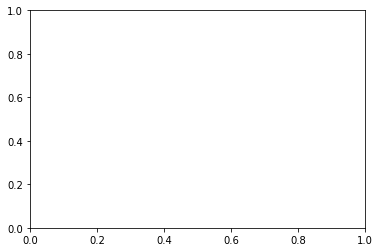

In [990]:
# Tried to plot but couldn't get it to work 

%matplotlib inline

fig = plt.figure()
ax1 = fig.add_subplot()
ax1 = plt.plot(x='2012_x', y='institution', data=sample_sorted_by_score)
ax2 = fig.add_subplot()
ax2 = plt.plot(x='2013_x', y='institution', data=sample_sorted_by_score)
ax3 = fig.add_subplot()
ax3 = plt.plot(x='2014_x', y='institution', data=sample_sorted_by_score)
ax4 = fig.add_subplot()
ax4 = plt.plot(x='2015_x', y='institution', data=sample_sorted_by_score)

plt.show()


### Findings for Part 4.

**Which universities consistently appear in the rankings, and which aren't?**
For this part, I created a list of universities that consistently appear in the rankings, and a list of universities that do not consistently appear in the rankings. Since there are 91 universities that consistently appear in teh rankings, I did not deem it appropriate to list them all here, but made a list called **universities_appear**. For the universities that do not consistently appear, I also made a list and stored the names, due to there being 933 university names, I left them in the list **not_consistent**. 

**Which universities are rising, falling, or stationary in rank over the years?**
For this portion, I took a subset of the data to demostrate which universities with consistent rankings had values that are rising, falling, or consistent. For this exercise, I chose the top 10 universities to demonstrate how little their values may change over the years, if at all. For instance, Harvard kept the same score and rank for each of the four years included in the dataset, while it can be seen that each of the schools in my subset decreased in score value between 2012 and 2013 and increased in score value for the years following, except for Harvard, which gives a NaN value because the score value remained consistent. 



### **Part 5.** For 10 Points: Using the education expenditure data, identify the nations that spent below the average of the OECD for Higher Education Institutions in 2000, but above the average in 2010.

* Sort the nations by difference between 2000 and 2010
* Plot the lag, and explain your answers.

In [810]:
# Load in the education expenditure data
# Source: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html
ed_expenditure_df = pd.read_csv('data_hw2/education_expenditure_supplementary_data.csv', encoding='utf8', 
                                engine='python')
ed_expenditure_df.head()

,country,institute_type,direct_expenditure_type,1995,2000,2005,2009,2010,2011
0,OECD Average,All Institutions,Public,4.9,4.9,5.0,5.4,5.4,5.3
1,Australia,All Institutions,Public,4.5,4.6,4.3,4.5,4.6,4.3
2,Austria,All Institutions,Public,5.3,5.4,5.2,5.7,5.6,5.5
3,Belgium,All Institutions,Public,5.0,5.1,5.8,6.4,6.4,6.4
4,Canada,All Institutions,Public,5.8,5.2,4.8,5.0,5.2,NaN


In [811]:
ed_expenditure_df.shape

(333, 9)

In [812]:
# determining how Higher Education Institutions is presented in the dataset - notice there is a space after
instit_lst = list(ed_expenditure_df['institute_type'].drop_duplicates())
print(instit_lst)

['All Institutions ', 'Elementary and Secondary Institutions ', 'Higher Education Institutions ']


In [813]:
higher_ed_df = ed_expenditure_df[ed_expenditure_df['institute_type']=='Higher Education Institutions ']
higher_ed_df.head()

,country,institute_type,direct_expenditure_type,1995,2000,2005,2009,2010,2011
74,OECD Average,Higher Education Institutions,Public,0.9,1.0,1.0,1.1,1.1,1.1
75,Australia,Higher Education Institutions,Public,1.2,0.8,0.8,0.7,0.8,0.7
76,Austria,Higher Education Institutions,Public,0.9,1.2,1.2,1.4,1.5,1.4
77,Belgium,Higher Education Institutions,Public,0.9,1.2,1.2,1.4,1.4,1.3
78,Canada,Higher Education Institutions,Public,1.5,1.6,1.5,1.5,1.6,NaN


In [857]:
# nations that spent below the OECD Average (1.0) for Higher Educaiton Institutions in 2000
less_than_avg_2000 = higher_ed_df[higher_ed_df['2000'] < 1.0]
sorted_lower = less_than_avg_2000.sort_values(by=['2000'], ascending=False)
sorted_lower

,country,institute_type,direct_expenditure_type,1995,2000,2005,2009,2010,2011
103,Spain,Higher Education Institutions,Public,0.8,0.9,0.9,1.1,1.1,1.0
86,Greece,Higher Education Institutions,Public,0.8,0.9,1.4,NaN,NaN,NaN
87,Hungary,Higher Education Institutions,Public,0.8,0.9,0.9,1.0,0.8,1.0
97,New Zealand,Higher Education Institutions,Public,1.1,0.9,0.9,1.1,1.0,1.0
75,Australia,Higher Education Institutions,Public,1.2,0.8,0.8,0.7,0.8,0.7
80,Czech Republic,Higher Education Institutions,Public,0.7,0.8,0.8,1.0,1.0,1.2
88,Iceland,Higher Education Institutions,Public,0.7,0.8,1.1,1.2,1.1,1.1
108,United States,Higher Education Institutions,Public,1.1,0.8,1.0,1.1,1.0,0.9
95,Mexico,Higher Education Institutions,Public,0.8,0.8,0.9,1.0,1.0,0.9
99,Poland,Higher Education Institutions,Public,0.8,0.8,1.2,1.1,1.0,1.0


In [858]:
# List of nations that spent below the OECD Average for 2000
belowavg_nation_lst = list(sorted_lower['country'])
print(belowavg_nation_lst[:5])

['Spain', 'Greece', 'Hungary', 'New Zealand', 'Australia']


In [854]:
# nations that spent above the OECD Average for Higher Education Institutions (1.0) in 2010
higher_than_avg_2010 = higher_ed_df[higher_ed_df['2010'] > 1.1]
sorted_higher = higher_than_avg_2010.sort_values(by=['2010'], ascending=False)
sorted_higher

,country,institute_type,direct_expenditure_type,1995,2000,2005,2009,2010,2011
83,Finland,Higher Education Institutions,Public,1.7,1.7,1.7,1.8,1.9,1.9
81,Denmark,Higher Education Institutions,Public,1.3,1.5,1.6,1.8,1.8,1.8
78,Canada,Higher Education Institutions,Public,1.5,1.6,1.5,1.5,1.6,NaN
98,Norway,Higher Education Institutions,Public,1.5,1.2,1.3,1.3,1.6,1.6
104,Sweden,Higher Education Institutions,Public,1.6,1.5,1.5,1.6,1.6,1.6
76,Austria,Higher Education Institutions,Public,0.9,1.2,1.2,1.4,1.5,1.4
77,Belgium,Higher Education Institutions,Public,0.9,1.2,1.2,1.4,1.4,1.3
82,Estonia,Higher Education Institutions,Public,NaN,NaN,0.9,1.3,1.3,1.4
84,France,Higher Education Institutions,Public,1.0,1.0,1.1,1.3,1.3,1.3
89,Ireland,Higher Education Institutions,Public,0.9,1.2,1.0,1.4,1.3,1.2


In [855]:
# List of nations that spent above the OECD Average for Higher Education Institutions in 2010
above_nation_lst = list(sorted_higher['country'])
print(above_nation_lst[:5])

['Finland', 'Denmark', 'Canada', 'Norway', 'Sweden']


In [852]:
# pd.merge(less_than_avg_2000, higher_than_avg_2010, on='business_id', how='outer')
# filtered_frame = pd.concat([less_than_avg_2000, higher_than_avg_2010],ignore_index=True)
# filtered_frame

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


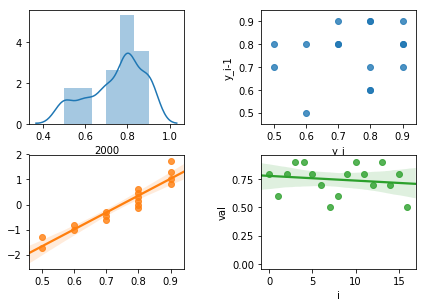

In [850]:
# Lag plot for spending less than average in 2000
multiplePlots(less_than_avg_2000['2000'])

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


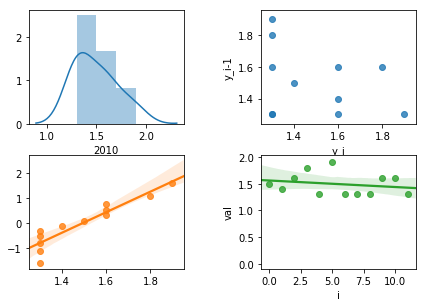

In [851]:
# Lag plot for spending higher than average in 2010
multiplePlots(higher_than_avg_2010['2010'])

### Findings for Part 5.

Comparing the plots above for the overall data for nations that spent either below the average of the OECD on Higher Education Institutions in 2000 or above the average of the OECD in 2010, it seems that the data for nations that spent below the average in 2000 is not normal and has a gap in the data. The data for the nations that spent above the average of the OECD in 2010 seems to be more together, but also looks a bit sparse.

When looking at the actual nations, the ones that spent below the average of the OECD in 2000, sorted by difference, were Spain, Greece, Hungary, New Zealand, and Australia. The top 5 nations that spent higher than the Higher Education Institutions OECD in 2010, sorted by difference, were: Finland, Denmark, Canada, Norway, and Sweden.

### **Part 6.** For 10 Points: Using the Times ranking, look at how the Female : Male ratio (`female_male_ratio` column) changes over time.

What were the distributions like in the year 2011 and 2016? How have these distributions changed?

You may want to convert the column values to an easier-to-understand measure, such as a percentage or the ratio of female students (the first numeric value in the ratio entry).

In [820]:
# convert female_male_ratio column into separate female and male columns
times_df['female'], times_df['male'] = times_df['female_male_ratio'].str.split(' : ', 1).str

In [821]:
times_df.head()

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year,country_code,female,male
0,1.0,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,20152.0,8.9,25%,NaN,2011,0,NaN,NaN
1,2.0,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,2243.0,6.9,27%,33 : 67,2011,0,33,67
2,3.0,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,11074.0,9.0,33%,37 : 63,2011,0,37,63
3,4.0,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,15596.0,7.8,22%,42 : 58,2011,0,42,58
4,5.0,Princeton University,United States of America,90.9,70.3,95.4,99.9,NaN,94.2,7929.0,8.4,27%,45 : 55,2011,0,45,55


In [822]:
times_df['male']= pd.to_numeric(times_df['male'], errors='coerce')
times_df['female']= pd.to_numeric(times_df['female'], errors='coerce')
times_df.dtypes

world_rank                float64
university_name            object
country                    object
teaching                  float64
international             float64
research                  float64
citations                 float64
income                    float64
total_score               float64
num_students              float64
student_staff_ratio       float64
international_students     object
female_male_ratio          object
year                        int64
country_code                int64
female                    float64
male                      float64
dtype: object

In [823]:
times_df['f_m_percent'] = (times_df['female']/times_df['male'])*100
times_df['f_m_percent'] = times_df['f_m_percent'].round(decimals=0)

In [824]:
times_df.head()

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year,country_code,female,male,f_m_percent
0,1.0,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,20152.0,8.9,25%,NaN,2011,0,NaN,NaN,NaN
1,2.0,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,2243.0,6.9,27%,33 : 67,2011,0,33.0,67.0,49.0
2,3.0,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,11074.0,9.0,33%,37 : 63,2011,0,37.0,63.0,59.0
3,4.0,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,15596.0,7.8,22%,42 : 58,2011,0,42.0,58.0,72.0
4,5.0,Princeton University,United States of America,90.9,70.3,95.4,99.9,NaN,94.2,7929.0,8.4,27%,45 : 55,2011,0,45.0,55.0,82.0


In [825]:
# data for 2011 from Times
times_2011 = times_df[times_df['year']==2011]
times_2011 = times_2011.dropna(subset=['f_m_percent'])
times_2011.head()

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year,country_code,female,male,f_m_percent
1,2.0,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,2243.0,6.9,27%,33 : 67,2011,0,33.0,67.0,49.0
2,3.0,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,11074.0,9.0,33%,37 : 63,2011,0,37.0,63.0,59.0
3,4.0,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,15596.0,7.8,22%,42 : 58,2011,0,42.0,58.0,72.0
4,5.0,Princeton University,United States of America,90.9,70.3,95.4,99.9,NaN,94.2,7929.0,8.4,27%,45 : 55,2011,0,45.0,55.0,82.0
5,6.0,University of Cambridge,United Kingdom,90.5,77.7,94.1,94.0,57.0,91.2,18812.0,11.8,34%,46 : 54,2011,1,46.0,54.0,85.0


/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


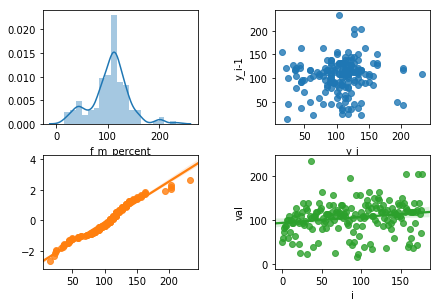

In [826]:
# 2011 distributions
multiplePlots(times_2011['f_m_percent'])

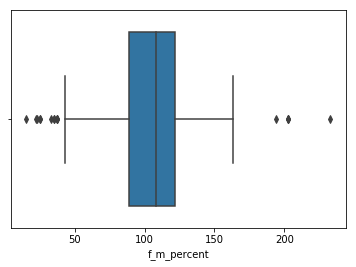

In [839]:
# Boxplot for Times 2011 female to male ratio
sns.boxplot(x=times_2011['f_m_percent']) 

In [848]:
# sns.distplot(times_2011['f_m_percent'], kde=True)

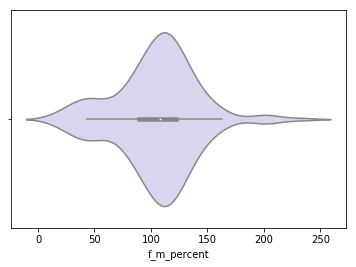

In [827]:
sns.violinplot(x=times_2011['f_m_percent'],color="#d7d0f3")

In [838]:
# Data for 2016 female to male percents from the Times data

times_2016 = times_df[times_df['year']==2016]

# find infinite values (infs), turn them into nan values, and drop them - found infs when initially trying to plot
times_2016 = times_2016.replace([np.inf, -np.inf], np.nan)
times_2016 = times_2016.dropna(subset=['f_m_percent'])

# This code shows that all inf and nan values are no longer in my data
m = list(times_2016['f_m_percent'])
print(m[:20])

[49.0, 85.0, 72.0, 85.0, 59.0, 82.0, 59.0, 45.0, 72.0, 100.0, 100.0, 100.0, 127.0, 108.0, 104.0, 92.0, 96.0, 92.0, 64.0, 138.0]


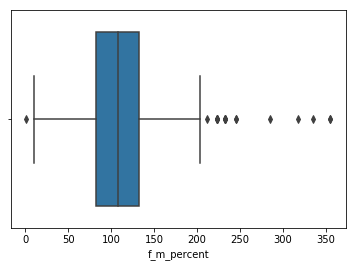

In [840]:
# Boxplot for Times 2016 female to male ratio
sns.boxplot(x=times_2016['f_m_percent']) 

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


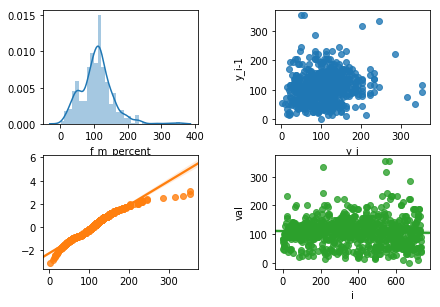

In [836]:
# 2016 Times Data plots for female to male ratios
multiplePlots(times_2016['f_m_percent'])

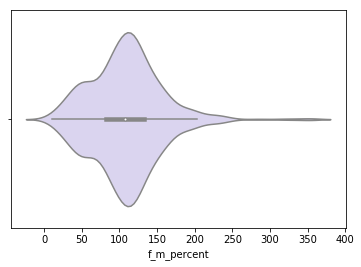

In [841]:
# Violin plot for Times 2016 female to male ratio
sns.violinplot(x=times_2016['f_m_percent'],color="#d7d0f3")

In [845]:
# Mean and median for the 2011 data
times_2011['f_m_percent'].mean(), times_2011['f_m_percent'].median()

(104.6067415730337, 108.0)

In [846]:
# Mean and median for the 2016 data
times_2016['f_m_percent'].mean(), times_2016['f_m_percent'].median()

(108.19319727891157, 108.0)

### Findings for Part 6.

Comparing the mean and median values for female to male ratios for the 2011 and 2016 data from the Times dataset, they seem relatively similar. The mean for the female to male ratio went from 104.6 in 2011 to 108.1 2016. The median for both 2011 and 2016 was the same at 108.0. From the histograms for bot sets of data, we can see that neither are evenly distributed, meaning neither exhibit normal distribution. The violin plots show a change in the distribution over time, specifically the number of outliers below 50 decrease and the number of outliers after 150 increases. The distribution in data also differs in that in 2016, the chunk of data is thicker.  

From the data, it seems that the thing that changed the most between 2011 and 2016 was how the data was distributed, even though the mean value only changed slightly.    

### *Bonus* – For 5 Points: Which, if any, of the rankings from the Kaggle data set support the claims made in [this Times Higher Education article on public schools](https://www.timeshighereducation.com/student/best-universities/best-public-universities-united-states)?

Justify your claim with specific examples or data.

In [ ]:
# put your code here

(Use this space to explain your answers)